# Assignment 4: House Prices - Data Exploration and Visualization 🏠💰

## 📚 Learning Objectives
- Load and understand real-world datasets.
- Perform **Exploratory Data Analysis (EDA)**.
- Visualize data distributions and correlations.

## Section 1: Getting the Data (10 marks)

### Q1 (10 marks)
Import `fetch_openml` from `sklearn.datasets`. Fetch the `house_prices` dataset. Print the shape of the data and display the first 5 rows.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns # Advanced plotting / Продвинутые графики
import ssl # Added to handle SSL certificate issues

# This creates an unverified SSL context to bypass the certificate verification error on macOS
ssl._create_default_https_context = ssl._create_unverified_context

# Fetch dataset (using ID 42165 for House Prices - Advanced Regression Techniques or similar)
# Note: 'house_prices' might refer to Ames Housing or similar on OpenML.
# We will use the Ames Housing dataset which is commonly used for this type of task.
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto') # Fetch Ames Housing dataset / Загрузить датасет Ames Housing

df = housing.frame # Convert to DataFrame / Конвертировать в DataFrame
print("Shape of dataset:", df.shape) # Check dimensions / Проверить размеры
df.head()

Shape of dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Section 2: Understanding the Problem (10 marks)

### Q2.1
Write code to determine:
1. The number of samples and features.
2. The data types of each column.
3. Which columns contain missing values.

In [3]:
print(f"1. Samples: {df.shape[0]}, Features: {df.shape[1]}") # Check dimensions / Проверить размеры

print("\n2. Data Types:")
print(df.dtypes.value_counts()) # Check data types / Проверить типы данных

print("\n3. Columns with Missing Values:")
missing_cols = df.columns[df.isnull().any()].tolist() # Check for missing values / Проверка на пропущенные значения
print(missing_cols)
print(f"Total columns with missing values: {len(missing_cols)}")

1. Samples: 1460, Features: 81

2. Data Types:
object     43
int64      35
float64     3
Name: count, dtype: int64

3. Columns with Missing Values:
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Total columns with missing values: 19


### Q2.2
**Question:** What is the machine learning problem type (classification, regression, etc.)?

**Answer:**
This is a **Regression** problem. We are predicting a continuous numerical value (the price of a house), not a category.

### Q2.3
**Question:** Identify the target variable in this dataset.

**Answer:**
The target variable is typically **SalePrice** (or similar name depending on the exact version loaded). In this OpenML version, it is likely the last column or named `SalePrice`.

### Q2.4
**Question:** Explain the difference between Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). When should each be preferred?

**Answer:**
- **MAE**: Average of absolute errors. It treats all errors equally. Preferred when outliers are not a huge concern or you want a metric that is easy to interpret.
- **RMSE**: Square root of the average of squared errors. It penalizes large errors more heavily (squaring makes big numbers bigger). Preferred when large errors are particularly undesirable.

## Section 3: Explore and Visualize the Data (20 marks)

### Q3.1
Import `matplotlib` and `seaborn`. Display summary statistics for the numerical columns using the `describe()` method.

In [4]:
df.describe() # Summary statistics / Описательная статистика


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Q3.2
Display a grid of histograms for the first six numerical columns in the dataset.

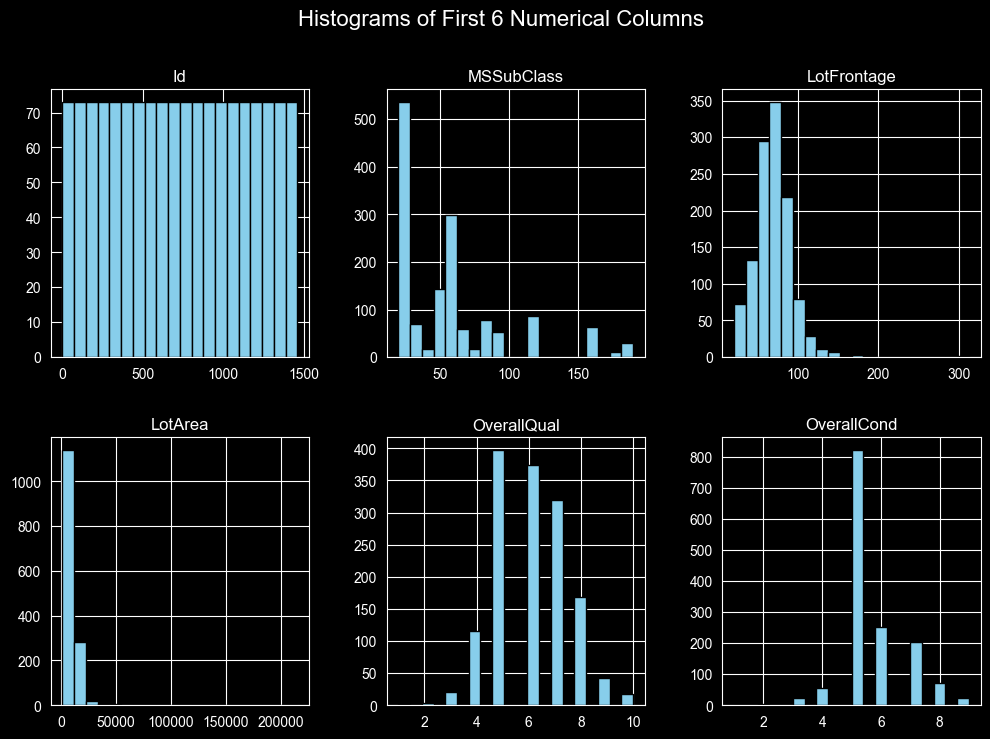

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns[:6] # Select numerical columns / Выбрать числовые колонки
df[num_cols].hist(bins=20, figsize=(12, 8), layout=(2, 3), color='skyblue', edgecolor='black') # Plot histograms / Построить гистограммы
plt.suptitle('Histograms of First 6 Numerical Columns', fontsize=16)
plt.show() # Show plot / Показать график


### Q3.3
Compute the correlation matrix of the dataset and visualize it using a heatmap. Use the `coolwarm` colormap and set the figure size to 10x8.

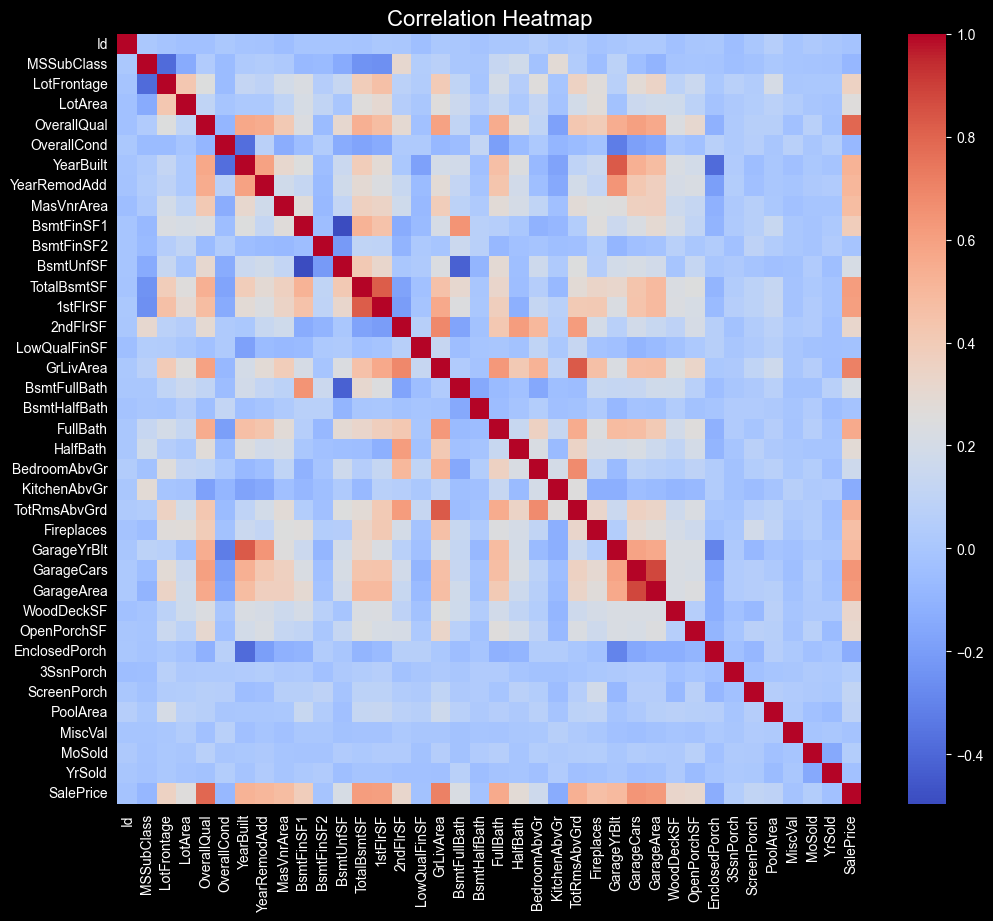

In [6]:
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation
corr_matrix = df.select_dtypes(include=[np.number]).corr() # Select numerical columns / Выбрать числовые колонки
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f") # Visualize correlation / Визуализация корреляции
plt.title('Correlation Heatmap', fontsize=16)
plt.show() # Show plot / Показать график


### Q3.4
Display the top 10 features that are most highly correlated with the target variable.

In [7]:
target = 'SalePrice'
if target in corr_matrix.columns:
    top_corr = corr_matrix[target].sort_values(ascending=False).head(11) # Top 10 + target itself
    print(top_corr)
else:
    print(f"Target '{target}' not found in correlation matrix.")

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


### Q3.4.1
**Question:** What are the top 4 features highly correlated with the target?

**Answer:**
Based on the output above, the top 4 features (excluding SalePrice itself) are typically:
1. **OverallQual** (Overall material and finish quality)
2. **GrLivArea** (Above grade (ground) living area square feet)
3. **GarageCars** (Size of garage in car capacity)
4. **GarageArea** (Size of garage in square feet)

### Q3.5
Create a scatter plot between the target variable and the second most highly correlated feature. Set `alpha=0.5` and include a title and axis labels.

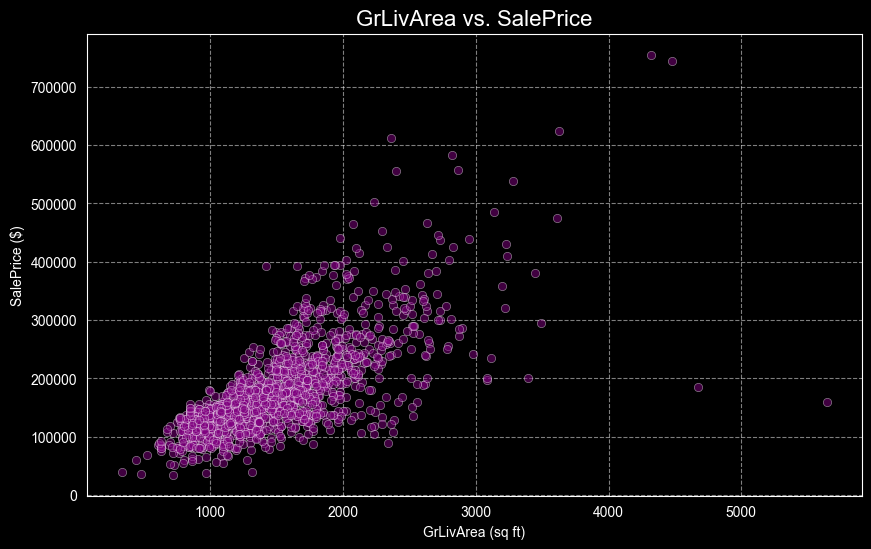

In [8]:
# Second most correlated is usually GrLivArea
feature = 'GrLivArea'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature, y=target, data=df, alpha=0.5, color='purple') # Scatter plot / Точечная диаграмма
plt.title(f'{feature} vs. {target}', fontsize=16)
plt.xlabel(f'{feature} (sq ft)')
plt.ylabel(f'{target} ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show() # Show plot / Показать график
